In [1]:
# import psycopg2
# from psycopg2 import sql
import pandas as pd

# # Database connection parameters
# db_params = {
#     'dbname': 'postgres',  # Replace with your database name
#     'user': 'postgres',          # Replace with your username
#     'password': 'Kalika@1992',      # Replace with your password
#     'host': 'localhost',              # Replace with your host, e.g., localhost or an IP address
#     'port': '5432'                    # Default PostgreSQL port
# }

# # Connect to the PostgreSQL database
# try:
#     conn = psycopg2.connect(**db_params)
#     cursor = conn.cursor()

#     # Create table query
#     create_table_query = '''
#     CREATE TABLE IF NOT EXISTS kalika_catalog (
#         item_id SERIAL PRIMARY KEY,
#         main_category VARCHAR(255),
#         sub_categories VARCHAR(255),
#         item_code VARCHAR(50),
#         product_title VARCHAR(255),
#         product_description TEXT,
#         upc VARCHAR(50),
#         brand VARCHAR(100),
#         department VARCHAR(100),
#         type VARCHAR(100),
#         tag VARCHAR(100),
#         list_price NUMERIC(10, 2),
#         price NUMERIC(10, 2),
#         inventory INTEGER,
#         min_order_qty INTEGER,
#         available TEXT,
#         large_image TEXT,
#         additional_images TEXT,
#         item_properties TEXT
#     )
#     '''

#     # Execute the create table query
#     cursor.execute(create_table_query)

#     # Commit changes and close the connection
#     conn.commit()
#     print("Table 'kalika_catalog' created successfully.")

# except Exception as e:
#     print(f"An error occurred: {e}")
# finally:
#     if cursor:
#         cursor.close()
#     if conn:
#         conn.close()

In [2]:
df = pd.read_csv('data/kalika_catalog_products.csv',encoding='latin1')
print(df.dtypes)
# df.to_csv('data/kalika_catalog_products.csv',encoding='utf-8')


Unnamed: 0               int64
Item Id                  int64
Main Category           object
Sub Categories          object
Item Code               object
Product Title           object
Product Description     object
UPC                     object
Brand                   object
Department             float64
Type                    object
Tag                    float64
List Price             float64
Price                  float64
Inventory              float64
Min Order Qty          float64
Available               object
Large Image             object
Additional Images      float64
Item Properties         object
dtype: object


In [11]:
sql_query="""ALTER TABLE kalika_catalog
# ALTER COLUMN available SET DATA TYPE text;"""

In [12]:
sql_query="""ALTER TABLE kalika_catalog
ALTER COLUMN inventory SET DATA TYPE NUMERIC(16, 2);"""

conn = psycopg2.connect(**db_params)
cur = conn.cursor()
cur.execute(sql_query)

# Commit the changes
conn.commit()

# # Close the cursor and connection
# conn.close()

In [13]:
import psycopg2
import os

# Database connection parameters
db_params = {
    'dbname': 'postgres',  # Replace with your database name
    'user': 'postgres',     # Replace with your username
    'password': 'Kalika@1992',  # Replace with your password
    'host': 'localhost',     # Replace with your host
    'port': '5432'           # Default PostgreSQL port
}

# Path to your CSV file
csv_file_path = 'V:/ML_projects/Kalika_projects/data/kalika_catalog_products.csv'  # Update with your actual file path

# Connect to the PostgreSQL database
try:
    conn = psycopg2.connect(**db_params)
    cursor = conn.cursor()

    # Ensure the CSV file exists before attempting to copy
    if not os.path.isfile(csv_file_path):
        raise FileNotFoundError(f"The file '{csv_file_path}' does not exist.")

    # Use \copy command via cursor.execute() with a string
    copy_query = f'''
    copy kalika_catalog(Item_Id, Main_Category, Sub_Categories, Item_Code,
                         Product_Title, Product_Description, UPC, Brand,
                         Department, Type, Tag, List_Price,
                         Price, Inventory, Min_Order_Qty,
                         Available, Large_Image, Additional_Images,
                         Item_Properties)
    FROM '{csv_file_path}'
    DELIMITER ','
    CSV HEADER;
    '''

    cursor.execute(copy_query)

    # Commit changes and close the connection
    conn.commit()
    print("Data imported successfully.")

except Exception as e:
    print(f"An error occurred: {e}")
finally:
    if cursor:
        cursor.close()
    if conn:
        conn.close()

An error occurred: extra data after last expected column
CONTEXT:  COPY kalika_catalog, line 2: "0,0,0,201624,Gloves,Gloves,N69PC-001-0026,COTTON GLOVES FOR EPOXY (PAIR),"Both side useable Gloves,M..."



In [75]:
# conn = psycopg2.connect(**db_params)
# cur = conn.cursor()
# # Open CSV file with error handling
# with open('kalika_catalog_products.csv', 'r', encoding='latin1', errors='replace') as f:
#     cur.copy_expert("COPY kalika_catalog FROM STDIN WITH CSV HEADER", f)


BadCopyFileFormat: extra data after last expected column
CONTEXT:  COPY kalika_catalog, line 418: "201877,Chisels,Chisels,N31-KENNEDYCHISEL12,CHISEL 12 INCH WITH BI-MATERIAL HAND GUARD,<div><p>CHISEL..."


In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv("../Kalika_projects-main/data/kalika_catalog_products.csv")

In [10]:
df.head(1)

,Unnamed: 0,Item Id,Main Category,Sub Categories,Item Code,Product Title,Product Description,UPC,Brand,Department,Type,Tag,List Price,Price,Inventory,Min Order Qty,Available,Large Image,Additional Images,Item Properties
0,0,201624,Gloves,Gloves,N69PC-001-0026,COTTON GLOVES FOR EPOXY (PAIR),"Both side useable Gloves,Made by grey 100% Cot...",2.02E+11,NaN,NaN,NaN,NaN,25.0,25.0,100.0,50.0,YES,COTTON_GLOVES_FOR_EPOXY_PAIR.jpg,NaN,"Lead_Time - 7, length - 9 inch, Material_Type ..."


In [4]:
# df[~df['Additional Images'].isna()]
df['Large Image']=df['Large Image'].apply(lambda x:x.replace('/20190501314/assets/items/largeimages/',''))


In [5]:
df['Large Image'].head()

0    COTTON_GLOVES_FOR_EPOXY_PAIR.jpg
1              POLYTHENE_GLOVES_1.jpg
2             GELCOAT_HAND_SLEEVE.jpg
3                3M_EAR_MUFF_1426.jpg
4         3M_Filter_Retainer_5011.jpg
Name: Large Image, dtype: object

In [15]:
from PIL import Image  
s=df['Large Image'][111]
# d=r'V:/ML_projects/Kalika_projects1/Kalika_projects-main'+s
# Read image
# print()
# d
img = Image.open(s)


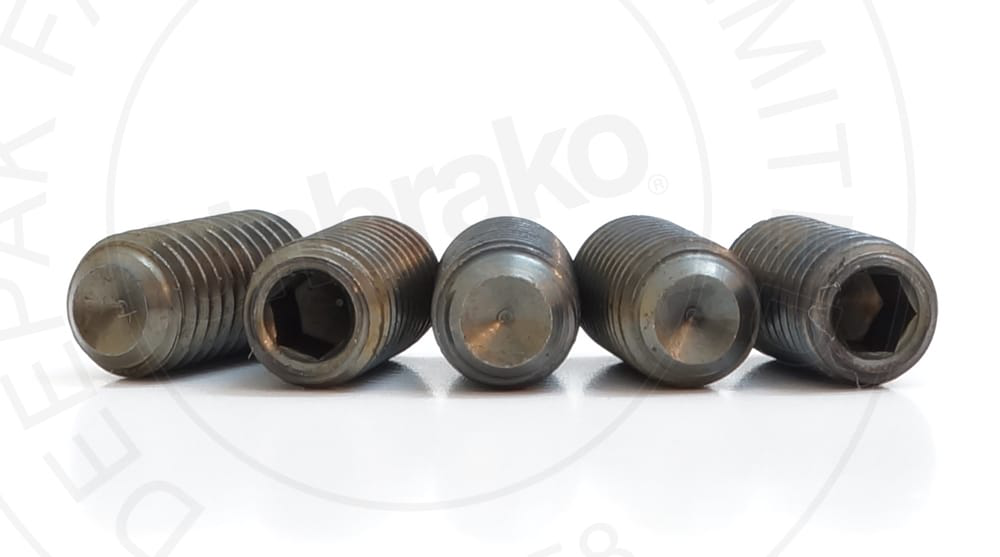

In [16]:
img

In [12]:
# Extract file extensions
df['extension'] = df['Large Image'].str.extract(r'(\.[a-zA-Z0-9]+)$')

# Count occurrences of each extension
extension_counts = df['extension'].value_counts()

# Print the counts
print("Count of each image extension:")
print(extension_counts)

Count of each image extension:
extension
.jpg     2760
.webp      98
.png       64
.jpeg      49
.gif       33
.PNG       23
.jfif      12
.JPG       10
Name: count, dtype: int64


In [6]:
# Save the DataFrame to a CSV file without the index
df.to_csv('imagedata1.csv', index=False)

In [20]:
df.columns

Index(['Unnamed: 0', 'Item Id', 'Main Category', 'Sub Categories', 'Item Code',
       'Product Title', 'Product Description', 'UPC', 'Brand', 'Department',
       'Type', 'Tag', 'List Price', 'Price', 'Inventory', 'Min Order Qty',
       'Available', 'Large Image', 'Additional Images', 'Item Properties',
       'extension'],
      dtype='object')

In [9]:
df['Large Image']

0                        COTTON_GLOVES_FOR_EPOXY_PAIR.jpg
1                                  POLYTHENE_GLOVES_1.jpg
2                                 GELCOAT_HAND_SLEEVE.jpg
3                                    3M_EAR_MUFF_1426.jpg
4                             3M_Filter_Retainer_5011.jpg
                              ...                        
3044                                          images.jfif
3045                                    tools_trolley.png
3046                      pdm-wmpumps-520re-pumphead.webp
3047                                          images.jpeg
3048    cp824-chicago-pneumatic-1-4-ratchet-wrench-600...
Name: Large Image, Length: 3049, dtype: object